# Artificial Recurrent Neural Network LTSM  (Long short-term memory) 
Prof. Fernando Amaral

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math

In [3]:
df = pd.read_csv("international-airline-passengers.csv", usecols=[1], skipfooter=3, engine='python')

In [4]:
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


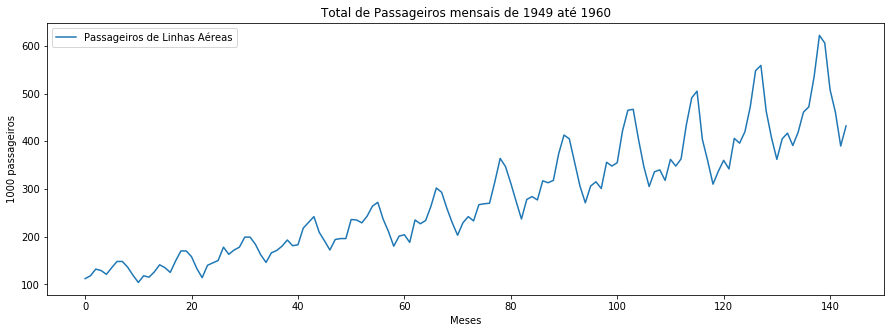

In [5]:
#visualizar
plt.figure(figsize=(15,5))
plt.plot(df, label='Passageiros de Linhas Aéreas')
plt.xlabel('Meses')
plt.ylabel('1000 passageiros')
plt.title('Total de Passageiros mensais de 1949 até 1960')
plt.legend()
plt.show()

In [17]:
data_raw = df.values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(data_raw)

In [18]:
TRAIN_SIZE = 0.75
train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[test_size:len(dataset),:]
print('Numero de observações (dados de treino, dados de teste): ' + str((len(train),len(test))))

Numero de observações (dados de treino, dados de teste): (108, 36)


In [24]:
def create_dataset(dataset, window_size=1):
    data_X, data_Y = [],[]
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size),0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size,0])
    return(np.array(data_X), np.array(data_Y))                    

In [25]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print('Formato original dos dados de treino:')
print(train_X.shape)

train_X = np.reshape(train_X, (train_X.shape[0],1,train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0],1,test_X.shape[1]))
print('Novo formato de treino:')
print(train_X.shape)

Formato original dos dados de treino:
(106, 1)
Novo formato de treino:
(106, 1, 1)


In [31]:
model = Sequential()

In [32]:
model.add(LSTM(4, input_shape = (1, window_size)))

In [33]:
model.add(Dense(1))

In [34]:
model.compile(loss = 'mean_squared_error', otimizer='adam')

In [35]:
model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=2)

Train on 106 samples
Epoch 1/100
106/106 - 2s - loss: 0.0530
Epoch 2/100
106/106 - 0s - loss: 0.0272
Epoch 3/100
106/106 - 0s - loss: 0.0200
Epoch 4/100
106/106 - 0s - loss: 0.0181
Epoch 5/100
106/106 - 0s - loss: 0.0169
Epoch 6/100
106/106 - 0s - loss: 0.0156
Epoch 7/100
106/106 - 0s - loss: 0.0143
Epoch 8/100
106/106 - 0s - loss: 0.0128
Epoch 9/100
106/106 - 0s - loss: 0.0116
Epoch 10/100
106/106 - 0s - loss: 0.0103
Epoch 11/100
106/106 - 0s - loss: 0.0089
Epoch 12/100
106/106 - 0s - loss: 0.0076
Epoch 13/100
106/106 - 0s - loss: 0.0064
Epoch 14/100
106/106 - 0s - loss: 0.0054
Epoch 15/100
106/106 - 0s - loss: 0.0045
Epoch 16/100
106/106 - 0s - loss: 0.0039
Epoch 17/100
106/106 - 0s - loss: 0.0034
Epoch 18/100
106/106 - 0s - loss: 0.0031
Epoch 19/100
106/106 - 0s - loss: 0.0029
Epoch 20/100
106/106 - 0s - loss: 0.0027
Epoch 21/100
106/106 - 0s - loss: 0.0026
Epoch 22/100
106/106 - 0s - loss: 0.0026
Epoch 23/100
106/106 - 0s - loss: 0.0026
Epoch 24/100
106/106 - 0s - loss: 0.0025
Epoc